<a href="https://colab.research.google.com/github/goodnessohi/demo/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step


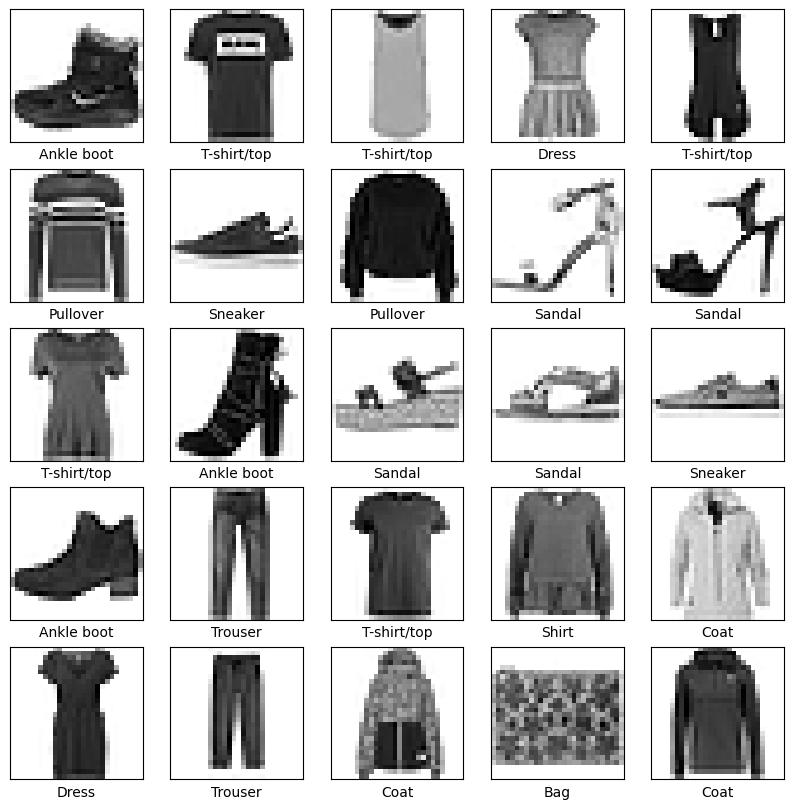

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [2]:
x_train = x_train / 255
x_test = y_train / 255

print("Pixel values after normalization (first image):")
print(x_train[0])

Pixel values after normalization (first image):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.     

Training Set Class Distribution:
Class 0 (T-shirt/top): 6000 instances
Class 1 (Trouser): 6000 instances
Class 2 (Pullover): 6000 instances
Class 3 (Dress): 6000 instances
Class 4 (Coat): 6000 instances
Class 5 (Sandal): 6000 instances
Class 6 (Shirt): 6000 instances
Class 7 (Sneaker): 6000 instances
Class 8 (Bag): 6000 instances
Class 9 (Ankle boot): 6000 instances

Test Set Class Distribution:
Class 0 (T-shirt/top): 1000 instances
Class 1 (Trouser): 1000 instances
Class 2 (Pullover): 1000 instances
Class 3 (Dress): 1000 instances
Class 4 (Coat): 1000 instances
Class 5 (Sandal): 1000 instances
Class 6 (Shirt): 1000 instances
Class 7 (Sneaker): 1000 instances
Class 8 (Bag): 1000 instances
Class 9 (Ankle boot): 1000 instances


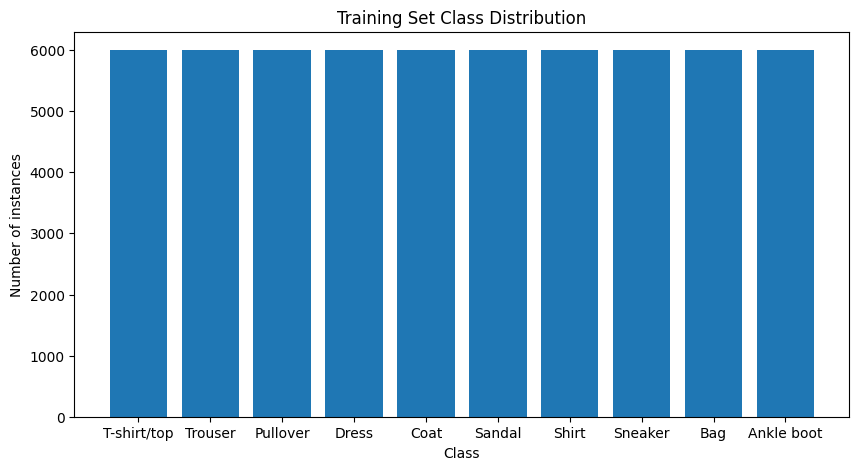

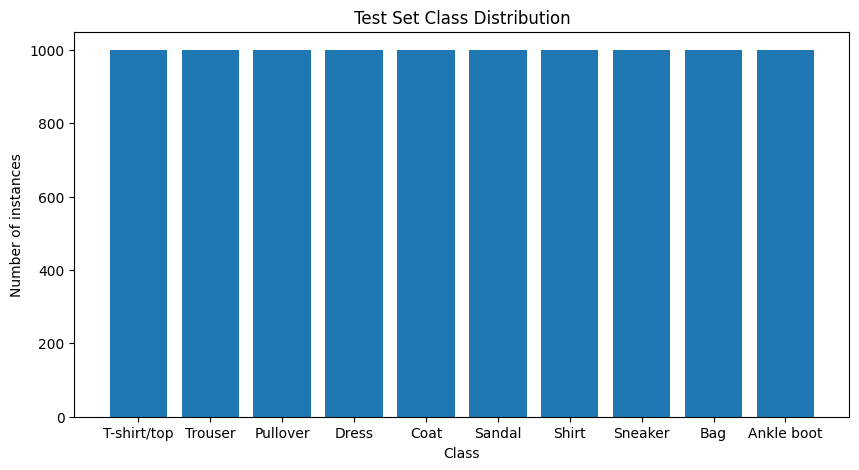

In [4]:
import numpy as np
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Count the number of instances for each class in the training set
train_class_counts = np.bincount(y_train)

# Count the number of instances for each class in the test set
test_class_counts = np.bincount(y_test)

# Print the counts for each class in the training set
print("Training Set Class Distribution:")
for i, count in enumerate(train_class_counts):
    print(f"Class {i} ({class_names[i]}): {count} instances")

# Print the counts for each class in the test set
print("\nTest Set Class Distribution:")
for i, count in enumerate(test_class_counts):
    print(f"Class {i} ({class_names[i]}): {count} instances")

# Function to plot class distribution
def plot_class_distribution(counts, class_names, title):
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(class_names)), counts, tick_label=class_names)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of instances")
    plt.show()

# Plot the class distribution for the training set
plot_class_distribution(train_class_counts, class_names, "Training Set Class Distribution")

# Plot the class distribution for the test set
plot_class_distribution(test_class_counts, class_names, "Test Set Class Distribution")

Training set shape: (48000, 28, 28, 1) (48000,)
Validation set shape: (12000, 28, 28, 1) (12000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                        

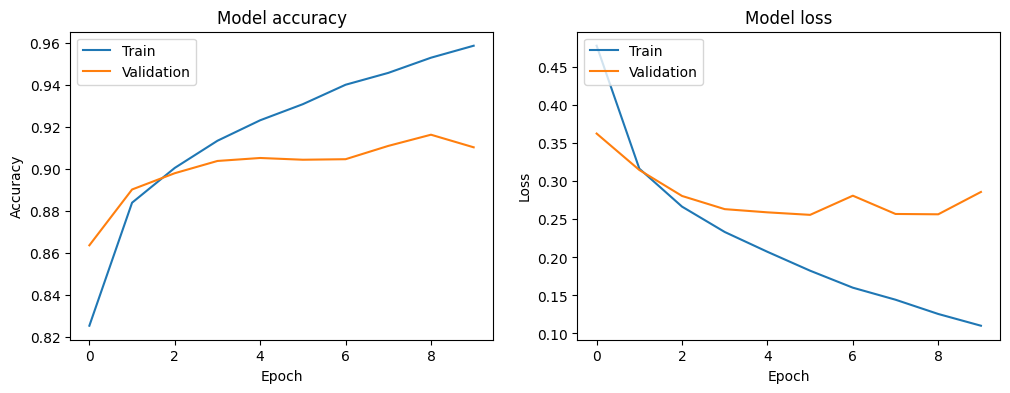

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to add a color channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Split the training set into a new training set and a validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new training and validation sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
